In [1]:
# Core analysis packages
import numpy as np
import os, sys
import pandas as pd
from scipy import stats

import matplotlib.pyplot as plt
plt.rcdefaults()
import seaborn as sns 
sns.set(style="ticks", color_codes=True)
sns.set_style("white")
sns.set_style({'xtick.bottom': True, 'ytick.left': True})
colorref = ["gray", "royalblue", "crimson", "goldenrod", "mediumorchid", "seagreen"]

# iPython magic commands
%matplotlib notebook
%load_ext autoreload
%autoreload 2
%autosave 30

SMALL_SIZE = 12
MEDIUM_SIZE = 12
BIG_SIZE = 14

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIG_SIZE)  # fontsize of the figure title
cust_palette = sns.color_palette("Paired")[6:10]
cust_palette = [cust_palette[i] for i in [1,0,3,2]]

def median_split(S):
    return S > S.median()

Autosaving every 30 seconds


In [2]:
df = pd.read_excel("data63.xlsx")
df

,ResponseId,Country,cond,one,condName,Order,Intervention_order,Belief1,Belief2,Belief3,...,Edu,Income,Indirect_SES,MacArthur_SES,PerceivedSciConsensu_1,Intro_Timer,condition_time_total,WEPTcc,BELIEFcc,POLICYcc
0,R_1d6rdZRmlD02sFi,Usa,11,1,FutureSelfCont,Policy,PolicySocialM,100.0,100.0,100.0,...,2.0,1.0,"2,3,4,6,7",7.0,81.0,25.566,1043.866,8,100.00,100.000000
1,R_1CjFxfgjU1coLqp,Usa,1,1,Control,Policy,PolicySocialM,100.0,100.0,100.0,...,4.0,NaN,"1,3,4,5,6,7",9.0,96.0,16.697,367.657,1,100.00,100.000000
2,R_qxty9a2HTTEq7Xb,Usa,1,1,Control,Policy,PolicySocialM,3.0,78.0,3.0,...,3.0,5.0,"2,3,4,5,6,7",6.0,76.0,24.055,79.902,8,30.25,66.444444
3,R_1ONRMXgQ310zjNm,Usa,12,1,BindingMoral,Policy,PolicySocialM,6.0,5.0,3.0,...,2.0,6.0,"2,3,4,5,6,7",6.0,22.0,11.647,2.701,8,4.50,16.000000
4,R_2VQr7rPu2yI8TnK,Usa,5,1,CollectAction,Policy,PolicySocialM,86.0,65.0,66.0,...,4.0,6.0,"1,2,3,4,5,6,7",10.0,76.0,26.658,398.695,2,71.75,67.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59435,R_1lyi688Kk094oLm,Vietnam,5,1,CollectAction,Policy,SocialMPolicy,98.0,100.0,99.0,...,3.0,NaN,5,4.0,90.0,10.131,74.142,6,99.25,100.000000
59436,R_1rkbbHRlgDFMXEJ,Vietnam,6,1,SystemJust,Policy,SocialMPolicy,100.0,99.0,98.0,...,3.0,5.0,"1,2,3,4,5,6,7",7.0,71.0,6.253,35.904,8,99.25,82.888889
59437,R_32Ko4BHFhcFWnQ1,Vietnam,3,1,NegativeEmotions,Policy,SocialMPolicy,28.0,99.0,77.0,...,3.0,3.0,"2,4,5,6,7",7.0,51.0,7.583,442.681,2,63.00,72.333333
59438,R_3rMtHx4LOa81P3T,Vietnam,4,1,SciConsens,Policy,SocialMPolicy,100.0,100.0,100.0,...,3.0,1.0,"1,2,4,5,6,7",6.0,100.0,12.301,8.746,8,100.00,89.888889


In [76]:
df['ide'] = (df['Politics2_1'] + df['Politics2_9'])/2
df

,ResponseId,Country,cond,condName,Intervention_order,Intro_Timer,Intervention_Timer,BELIEFcc,POLICYcc,SHAREcc,...,binWEPT1,binWEPT2,binWEPT3,binWEPT4,binWEPT5,binWEPT6,binWEPT7,binWEPT8,WEPT,ide
0,R_0031kFvKFnFD4E9,Israel,7,PsychDistance,SocialmediasharingPipedText|PolicySupport|Beli...,4.801,104.031,92.75,86.888889,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,57.0
1,R_0059fW1EtKYsTWV,Brazil,5,CollectAction,BeliefinAnthrCC|SocialmediasharingPipedText|Po...,11.155,198.395,100.00,100.000000,1.0,...,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,5.0,4.5
2,R_00688n4RYG3zIel,Macedonia,10,DynamicNorm,SocialmediasharingPipedText|PolicySupport|Beli...,29.154,83.853,100.00,54.000000,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,50.0
3,R_0086kfWbVfurc1H,France,8,PluralIgnorance,PolicySupport|SocialmediasharingPipedText|Beli...,8.301,29.399,80.25,85.222222,1.0,...,1.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,R_00B8XyVmrMofqGB,UK,8,PluralIgnorance,SocialmediasharingPipedText|PolicySupport|Beli...,17.951,148.918,51.00,48.777778,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,48.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54653,R_zZMtNlzas0E8RyN,Slovakia,9,LetterFuture,BeliefinAnthrCC|PolicySupport|Socialmediashari...,31.481,316.675,98.50,91.333333,0.0,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,93.0
54654,R_zZPllZfBJWjfSCZ,Switzerland,9,LetterFuture,SocialmediasharingPipedText|BeliefinAnthrCC|Po...,5.627,206.393,63.00,47.444444,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,49.5
54655,R_zZPOdDw0XWugcH7,Israel,10,DynamicNorm,PolicySupport|SocialmediasharingPipedText|Beli...,16.698,104.157,98.75,63.888889,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,62.5
54656,R_zZpwx0yCZNh32ql,Algeria,10,DynamicNorm,BeliefinAnthrCC|PolicySupport|Socialmediashari...,17.577,79.966,13.75,25.750000,0.0,...,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,42.0


<IPython.core.display.Javascript object>


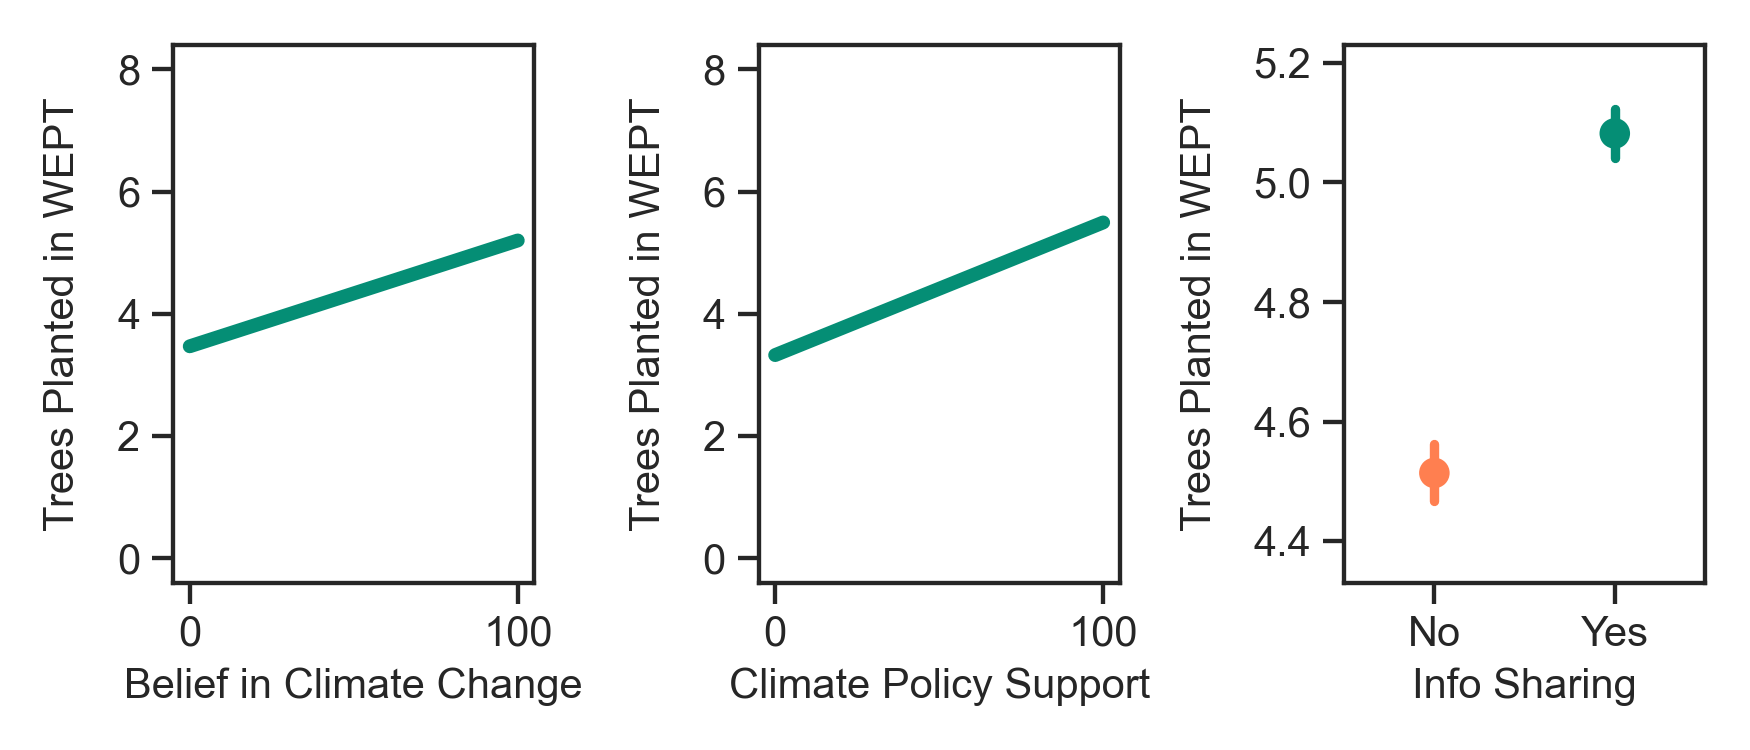

/Users/madalina/anaconda3/envs/research/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/madalina/anaconda3/envs/research/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/madalina/anaconda3/envs/research/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


In [4]:
colors = ["#ff7f50", "#058E75"]

fig, ax = plt.subplots(1,3, figsize=(7,3))
sns.regplot(x=df.BELIEFcc, y=df.WEPTcc, scatter_kws={"s": 0}, line_kws={"color":"#058E75","alpha":1,"lw":4}, ax=ax[0])
sns.regplot(x=df.POLICYcc, y=df.WEPTcc, scatter_kws={"s": 0}, line_kws={"color":"#058E75","alpha":1,"lw":4}, ax=ax[1])
sns.pointplot(x="SHAREcc", y="WEPTcc", data=df, palette=colors, ax=ax[2]) 

ax[2].set_xlabel('Info Sharing')
ax[2].set_ylabel('Trees Planted in WEPT', labelpad=10)
ax[2].set_xticklabels(['No', 'Yes'])
ax[0].set_ylabel('Trees Planted in WEPT', labelpad=10)
ax[0].set(xlabel='Belief in Climate Change')
ax[1].set(xlabel='Climate Policy Support')
ax[1].set_ylabel('Trees Planted in WEPT', labelpad=10)

plt.ylim(4.33,5.23)

plt.tight_layout()
plt.savefig('FigS3.png', dpi=400, format="png")

<IPython.core.display.Javascript object>


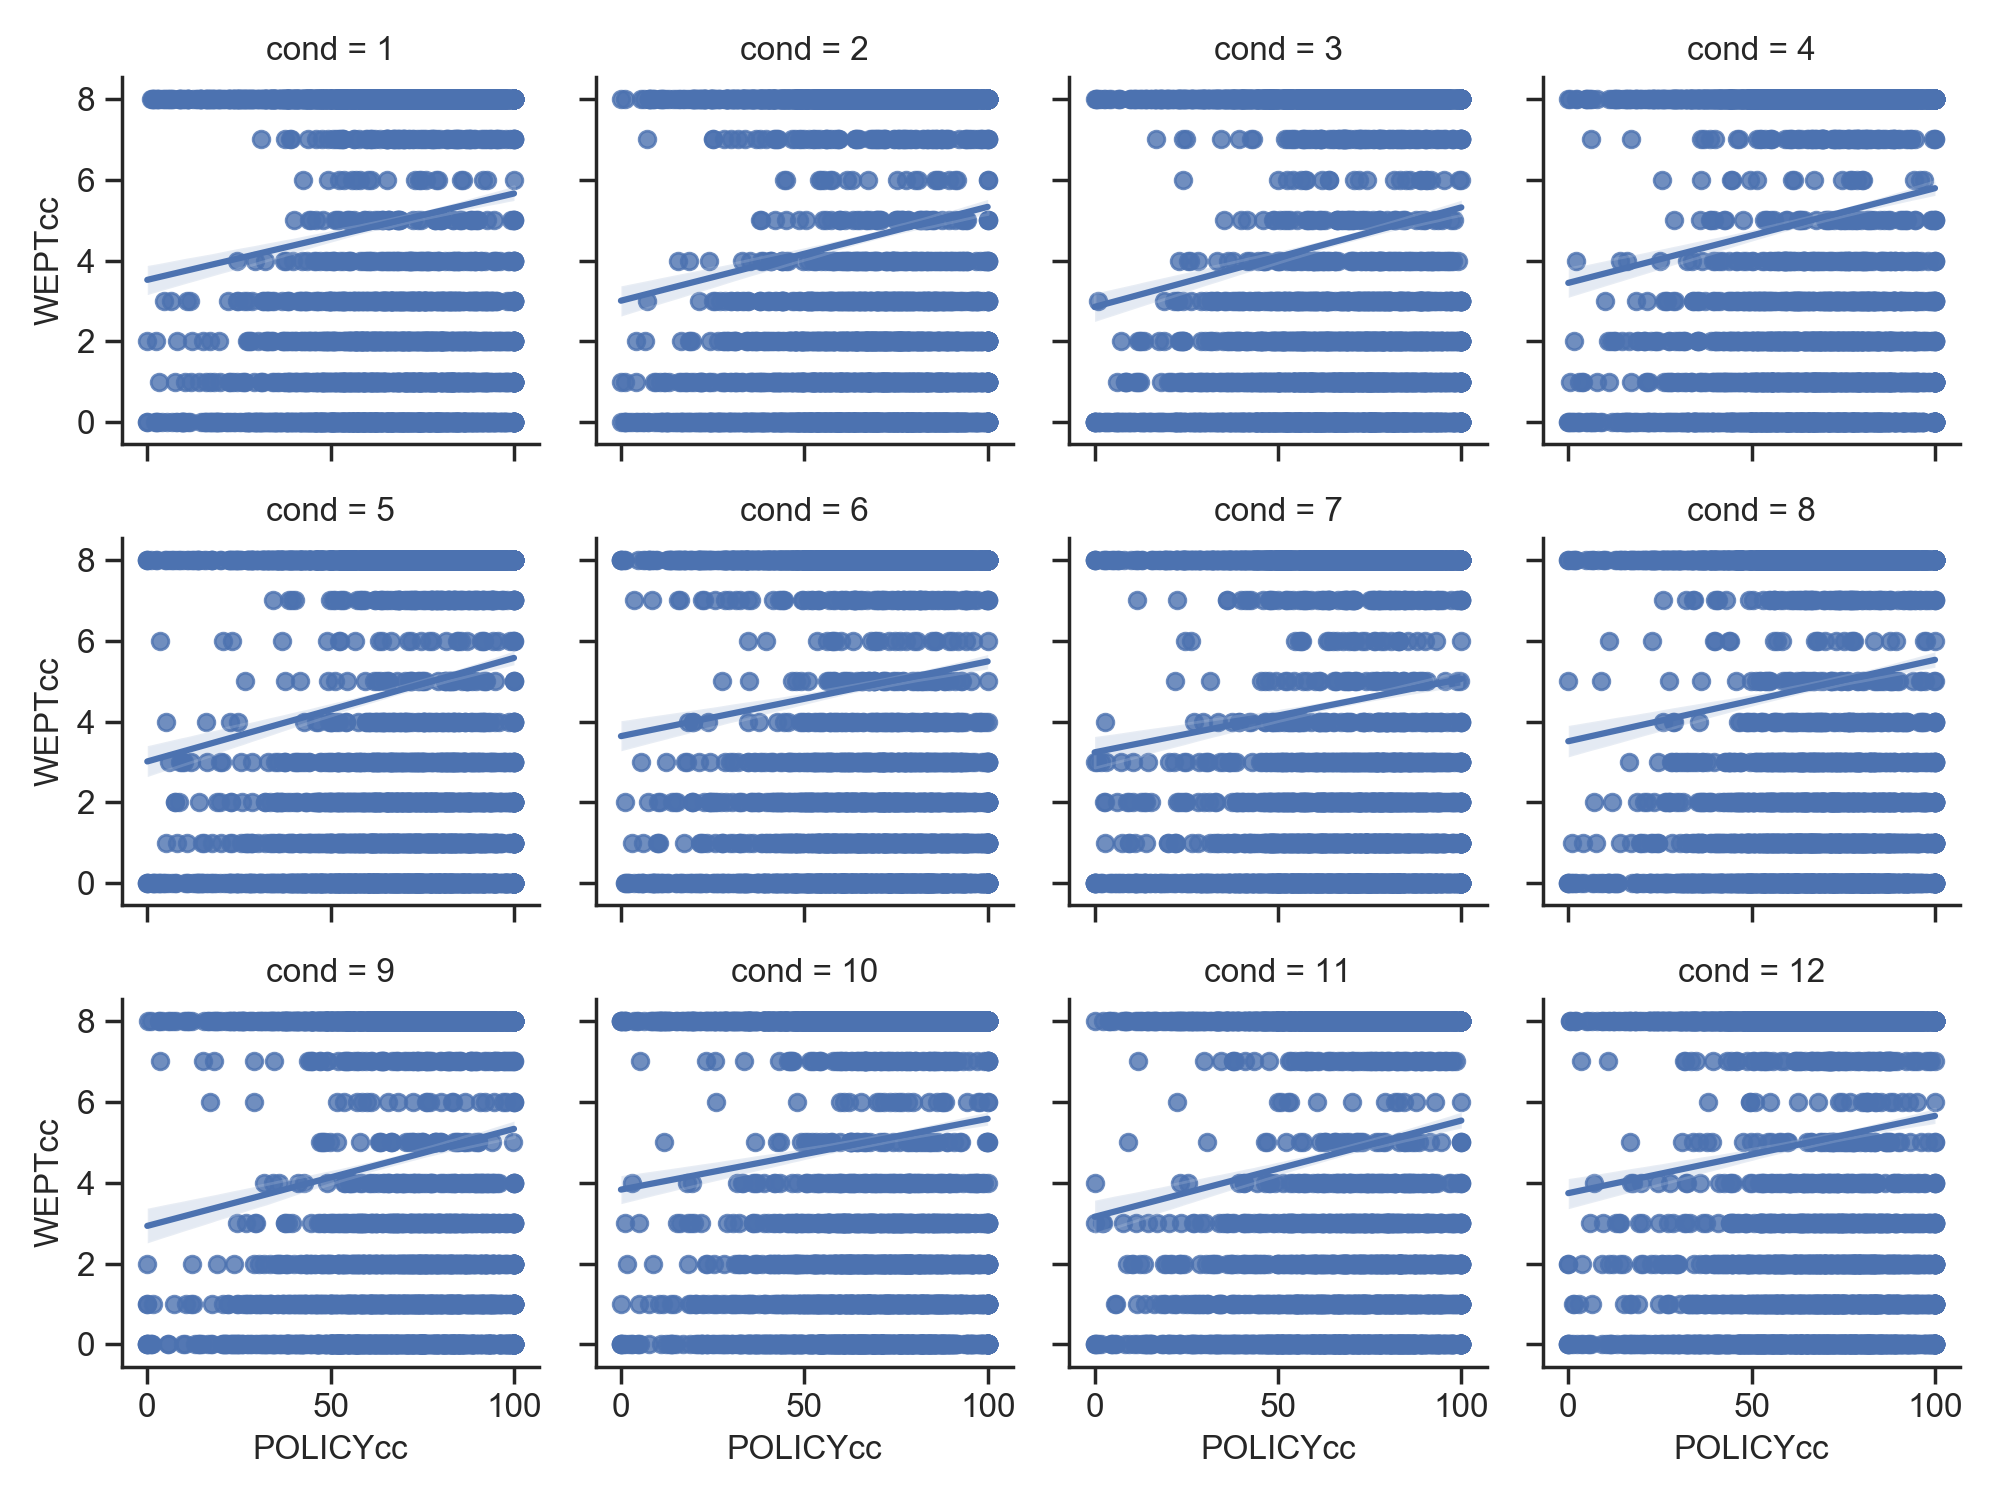

In [24]:
grid = sns.lmplot(x = "POLICYcc", y = "WEPTcc", col = "cond", col_wrap = 4, data = df, height=2.5)